Welcome to the World of Coffee! In this notebook, we will be exploring the top rated coffee brands, and their origins and roast types. We will use the <a href="https://www.kaggle.com/datasets/hanifalirsyad/coffee-scrap-coffeereview">*simplified_coffee.csv*</a> dataset to analyze the ratings and see which brands, origins, and roast types come out on top.

Coffee is one of the most popular beverages in the world, with billions of cups consumed every day. It is a drink that brings people together and has a rich history and culture. From the ancient kingdoms of Ethiopia to the modern coffee shops of today, coffee has been a staple in many societies for centuries.

In this notebook, we will look at the average ratings of coffee brands, origins, and roast types. We will use the **ggplot2** and **highcharter** libraries to create charts and visualize our findings to have a clear understanding of which brands, origins, and roast types are the most highly rated.

Let's get started and see what we can discover about the world of coffee!

# Interesting Facts About Coffee <a id="facts"></a>

Coffee is the second most traded commodity in the world, after petroleum. It is consumed by millions of people every day, and is grown in over 60 countries. The coffee plant is a small shrub, and it takes approximately 5 years for a coffee plant to produce its first harvest. Coffee plants can live for up to 100 years and produce coffee beans for up to 50 years.

Coffee has a rich and interesting history, originating in the highlands of Ethiopia, where the coffee plant is thought to have been discovered over 1,000 years ago. Coffee was first brought to Europe in the 16th century and quickly spread to other parts of the world, including North America and South America. Today, coffee is a staple drink in many cultures, and there are countless ways to prepare and enjoy it.

Whether you are a coffee connoisseur or just a casual drinker, this analysis gives you a glimpse into the world of coffee and the best rated coffee brands. Let's start brewing!

In [ ]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
# Set the dimensions of the charts(ggplot2)
options(repr.plot.width = 14, repr.plot.height = 8)

In [ ]:
coffee <- read_csv("simplified_coffee.csv")

head(coffee)

Rows: 1246 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): name, roaster, roast, loc_country, origin, review_date, review
dbl (2): 100g_USD, rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roasted cacao nib, date, rice candy, white peppercorn in aroma and cup. Savory-tart structure; delicate, silky mouthfeel. The richly drying finish leads with cocoa-toned, crisply sweet floral notes in the short and a hint of spice (white peppercorn) in the long."
Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn, date, myrrh, lavender, roasted cacao nib in aroma and cup. Crisp, spice-toned structure with citrus-like acidity; satiny, very smooth mouthfeel. The crisply sweet finish centers around spice and pungent floral notes."
Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tangerine zest, dark chocolate, pistachio in aroma and cup. Sweet and juicy yet crisp in structure (think ripe pear); plush and buoyant in mouthfeel. Resonant and flavor saturated in the short finish; simplifies around hints of tangerine and pistachio in the long."
Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibiscus, fine musk, almond, sandalwood, raspberry in aroma and cup. Fruit-toned, deeply sweet structure with gently-expressed acidity; buoyant, satiny-smooth mouthfeel. The crisp, flavor-saturated finish is characterized by sweet-tart fruit and floral tones (raspberry, hibiscus)."
Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, almond butter, maple syrup, cherry brandy in aroma and cup. Crisp, sweetly-tart in structure; plush, syrupy mouthfeel. Notes of magnolia and dried apricot dominate in the flavor-laden short finish, with hints of almond butter and fruit brandy in the long."
Ethiopia Hambela Alaka,Black Oak Coffee Roasters,Medium-Light,United States,Ethiopia,5.14,93,November 2017,"Very delicate, sweetly savory. Lemon verbena, allspice, dried persimmon, dogwood, baker’s chocolate in aroma and cup. Balanced, sweet-savory structure; velvety-smooth mouthfeel. The sweetly herb-toned finish centers on notes of lemon verbena and dried persimmon wrapped in baker’s chocolate."


In [ ]:
summary(coffee)

     name             roaster             roast           loc_country       
 Length:1246        Length:1246        Length:1246        Length:1246       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    origin             100g_USD          rating      review_date       
 Length:1246        Min.   :  0.17   Min.   :84.00   Length:1246       
 Class :character   1st Qu.:  5.26   1st Qu.:93.00   Class :character  
 Mode  :character   Median :  6.17   Median :93.00   Mode  :character  
                    Mean   : 10.48   Mean   :93.31                     
                    3rd Qu.:  9.60   3rd Qu.:94.00                     
                    Max.   :1

Wow! Maximum price of 132.25 compared to average of 10.48 and minimum price of 0.17.

# Top rated coffee brands <a id="top_coffe"></a>

In this section, we are going to look at the top 25 rated coffee brands. For coffee lovers, nothing is more important than having the best possible taste. In this section, we'll take a look at the top rated coffee brands and learn more about their origin and roast type.

To start, we first make sure that the rating variable is in a numeric format and then order the data in a descending order by rating. The resulting data is then plotted using a bar chart. The bar chart displays the top 25 rated coffee brands, along with their rating, origin and name. The x-axis shows the rating and the y-axis displays the name of the coffee. The color of each bar represents the origin of the coffee.

In [ ]:
coffee$rating <- as.numeric(coffee$rating) # make sure the rating variable is numeric

coffee <- coffee %>% 
  rename(price = "100g_USD")

coffee <- coffee[order(-coffee$rating),]

top_25_coffees <- head(coffee, 25) # select the top 25 rated coffees

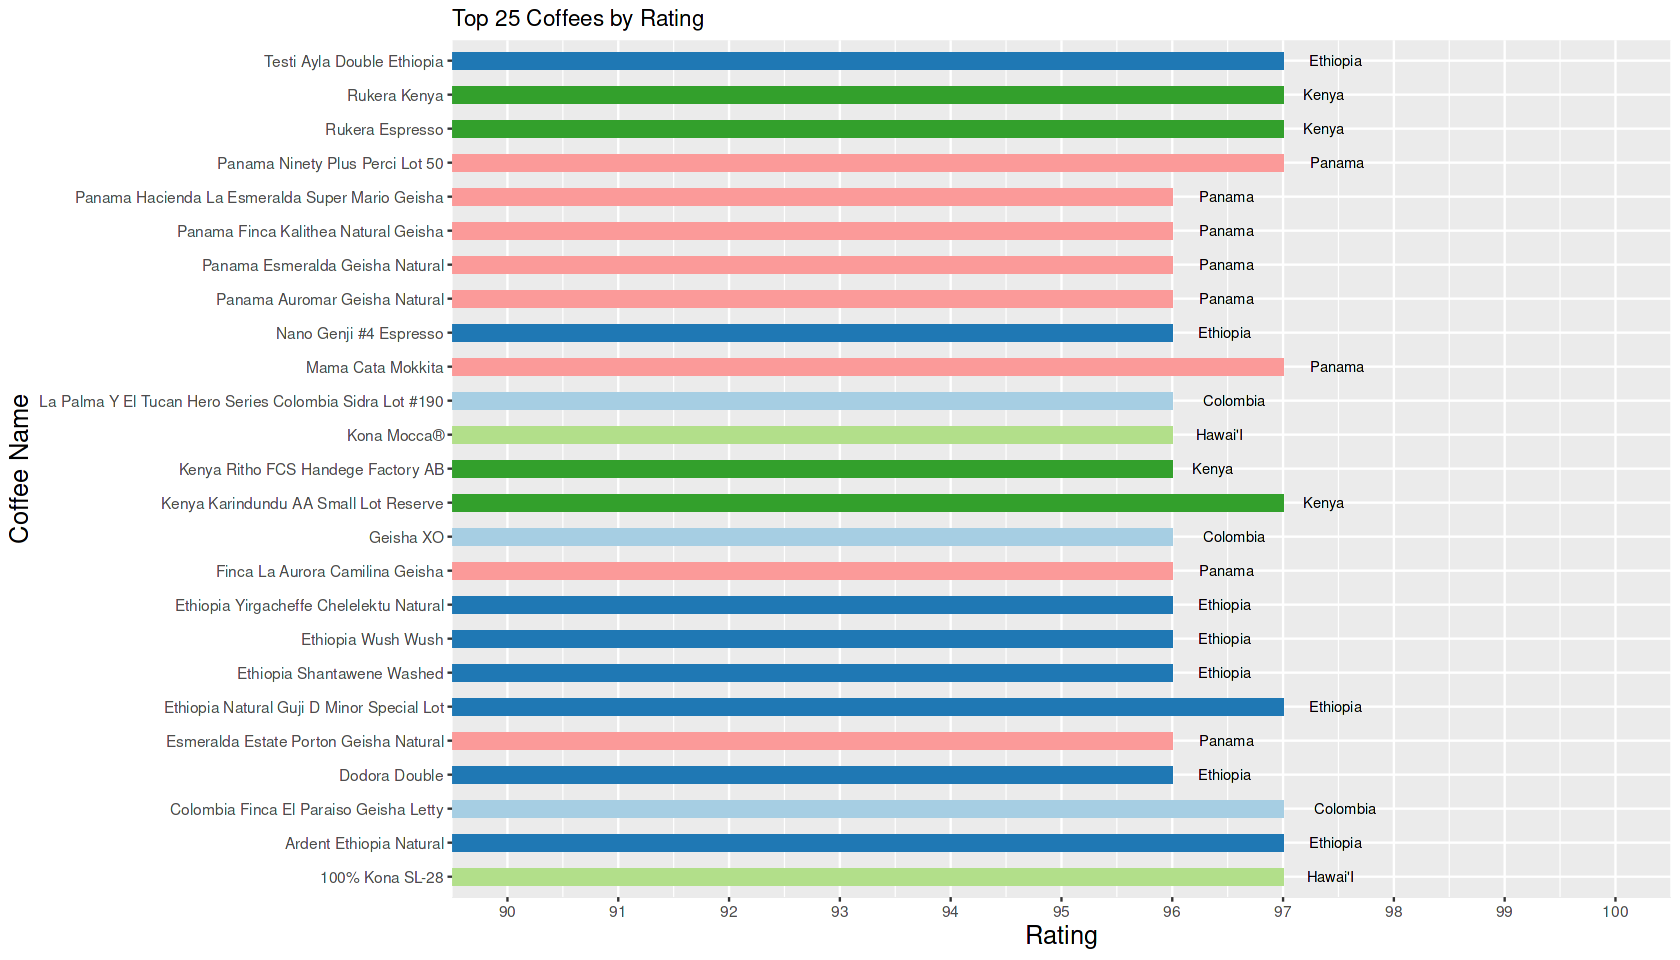

In [ ]:
ggplot(top_25_coffees, aes(x=rating, y=name, fill=origin)) +
  geom_bar(stat = "identity", width = 0.5) +
  scale_fill_brewer(palette="Paired") +
  ggtitle("Top 25 Coffees by Rating") +
  xlab("Rating") +
  ylab("Coffee Name") +
  theme(axis.text.y = element_text(size = 9),
        axis.text.x = element_text(size = 9),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15)) +
  theme(legend.position = "none") +
  geom_text(aes(label = origin), size = 3, hjust = -0.5, vjust = 0.5) +
  coord_cartesian(xlim = c(90, 100)) + #The coord_cartesian() function is used to set the x-axis limits, and the argument xlim = c(90, 100) sets the starting point of the x-axis to 90, and the end point to 100.
  scale_x_continuous(breaks = seq(90, 100, by = 1)) #The breaks = seq(90, 100, by = 1) means that the x axis will start at 90 and count to 100 by 1.

Chart shows that Ethiopia and Panama orignated coffees dominating the top places with 10 brands share the 1st place.

# Top rated coffees by origin, roast type <a id="origins-roasts"></a>

In this section, we are going to analyze the top rated coffee beans by origin and roast type. We first group the data by origin and roast type, and then calculate the average rating for each group. The resulting data is then plotted using bar charts.

For the origin chart, we create a vertical bar chart, with the origin on the y-axis and the average rating on the x-axis. The chart displays the average rating of each origin and allows us to compare the different origins and their respective ratings.

For the roast chart, we create a horizontal bar chart, with the roast type on the x-axis and the average rating on the y-axis. The chart displays the average rating of each roast type and allows us to compare the different roast types and their respective ratings.

The results of these two charts will give us valuable insights into the relationship between origin and roast type, and the ratings of coffee beans. We'll be able to see which origins and roast types are more highly rated, and which origins and roast types might need some improvement.

In [ ]:
# Top rated coffees by origins
by_origin <- coffee %>%
  group_by(origin) %>%
  summarize(average_rating = mean(rating, na.rm = TRUE)) %>%
  arrange(desc(average_rating))

In [ ]:
# Top rated coffees by roast
by_roast <- coffee %>%
  group_by(roast) %>%
  summarize(average_rating = mean(rating, na.rm = TRUE)) %>%
  arrange(desc(average_rating)) %>% 
  drop_na()

In [ ]:
# Used the fct_reorder() function from the forcats package to reorder the categorical variables by their average rating. This will ensure that the bars are arranged in descending order by rating.
by_origin$origin <- fct_reorder(by_origin$origin, by_origin$average_rating)
by_roast$roast <- fct_reorder(by_roast$roast, by_roast$average_rating)

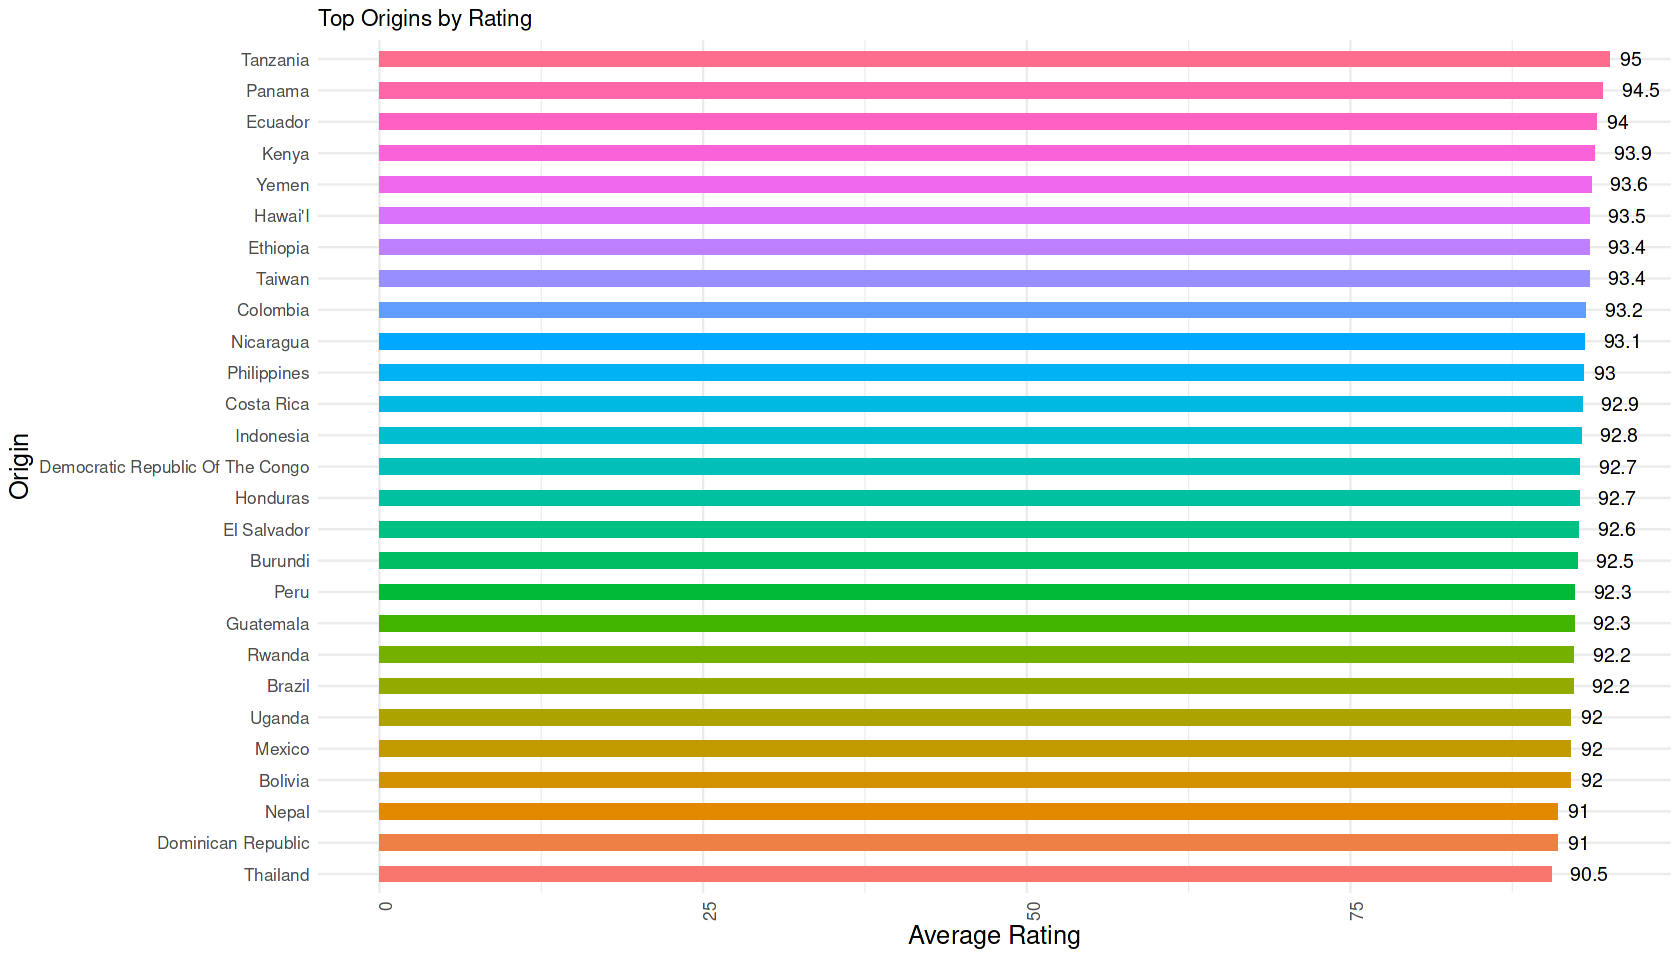

In [ ]:
ggplot(by_origin, aes(x = reorder(origin, average_rating), y = average_rating, fill = origin)) +
  geom_bar(stat = "identity", width = 0.5) +
  ggtitle("Top Origins by Rating") +
  xlab("Origin") +
  ylab("Average Rating") +
  theme_classic() +
  theme(axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))  +
  coord_flip() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = "none") +
  geom_text(aes(label = round(average_rating, 1)), size = 4, hjust = -0.5, vjust = 0.5)

The results show that the top rated coffee origins come from various continents including Africa, South America, Asia, and Central America. It is interesting to see that African countries such as Tanzania, Kenya, and Ethiopia rank highly in terms of coffee quality, while South American countries like Ecuador and Colombia also score well. Additionally, the data indicates that coffee from Asia, such as Taiwan and the Philippines, is of a high quality, while coffee from countries like Nepal and Thailand show potential for improvement. It is worth noting that coffee from North America and Europe is not present in the top 20.

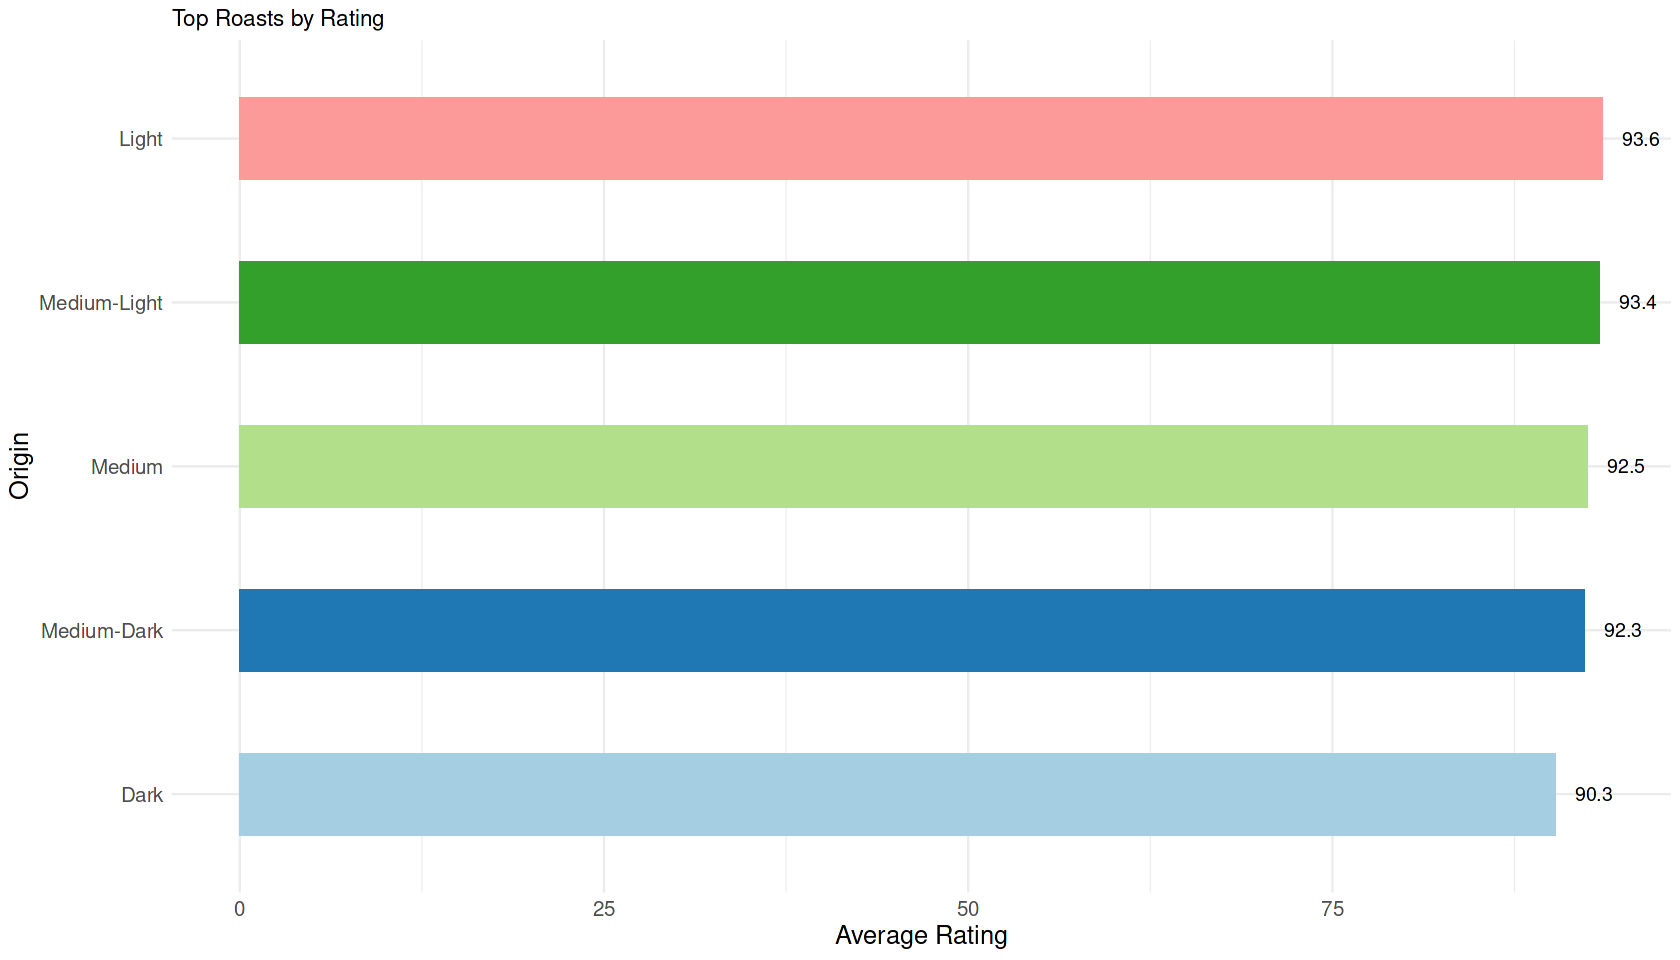

In [ ]:
# Create a horizontal bar chart for roast data
ggplot(by_roast, aes(x = reorder(roast, average_rating), y = average_rating, fill = roast)) +
  geom_bar(stat = "identity", width = 0.5) +
  scale_fill_brewer(palette="Paired") +
  xlab("Origin") +
  ggtitle("Top Roasts by Rating") +
  ylab("Average Rating") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 12),
        axis.text.x = element_text(size = 12),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15)) +
  coord_flip() +
  geom_text(aes(label = round(average_rating, 1)), size = 4, hjust = -0.5, vjust = 0.5) +
  theme(legend.position = "none")

It is clear that as coffee gets darker, quality decreases.

This trend can be observed by analyzing the distribution of coffee ratings according to roast level. Light roast coffee is often characterized by a bright, acidic flavor profile and higher caffeine content, while dark roast coffee tends to have a more bitter, smoky flavor and lower caffeine levels. This suggests that lighter roasts are favored by coffee connoisseurs and experts, as they highlight the unique flavor notes of the coffee beans and retain more of their original caffeine content.

However, it's worth noting that dark roast coffee still has its fans and may be preferred by those who enjoy its bold, rich flavor. Additionally, some coffee drinkers may choose dark roast over lighter roasts for the higher caffeine content, as darker roasts can have more caffeine due to the roasting process.

Overall, this relationship between roast level and coffee quality highlights the subjective nature of coffee preferences and the importance of considering individual tastes and preferences when evaluating coffee quality. So, there is no one size fits all answer to the question of roast level and quality.

### Best Coffee Shop Locations <a id="shops"></a>

In this section we are going to have a look at which locations have the best coffee shops in the world. 

We are going to do that by grouping the data by coffee shop locations(loc_country) and calculating the average rating. Then create a lollipop chart to see the results.

In [ ]:
coffee_shops <- coffee %>%
  group_by(loc_country) %>%
  summarize(average_rating = mean(rating, na.rm = TRUE)) %>%
  arrange(desc(average_rating))

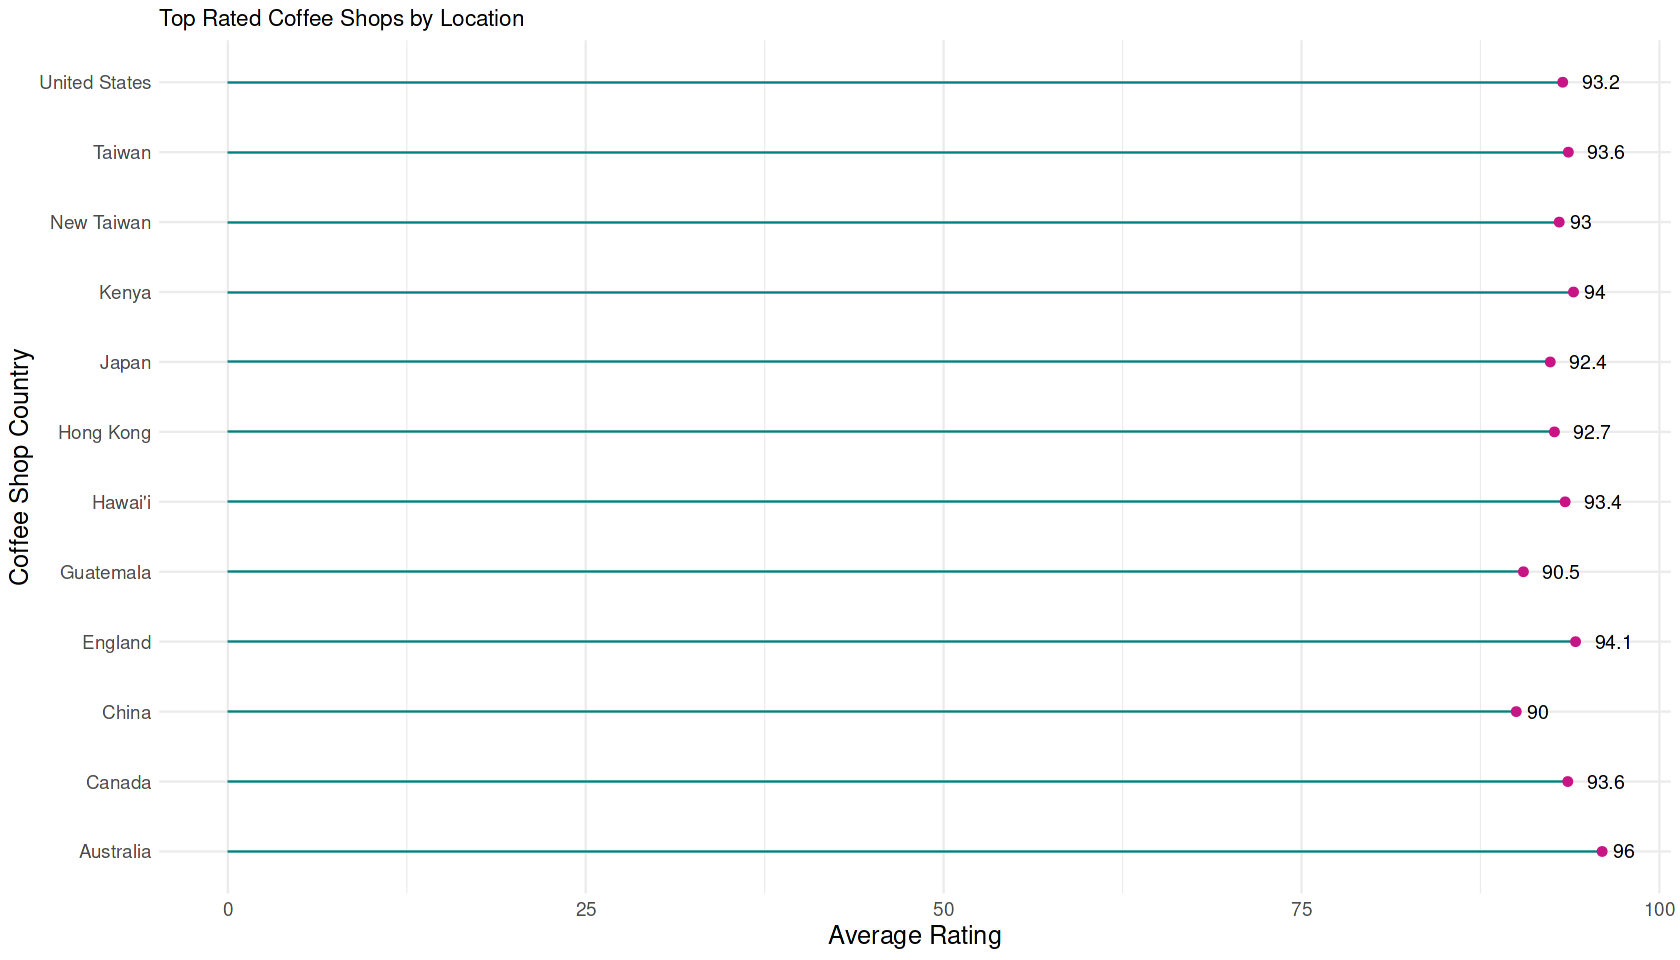

In [ ]:
# Create lollipop chart
ggplot(coffee_shops, aes(x = loc_country, y = average_rating)) +
  geom_segment(aes(x = loc_country, xend = loc_country, y = 0, yend = average_rating), color = "#008080") +
  geom_point(color = "mediumvioletred", size = 2) +
  theme_minimal() +
  xlab("Coffee Shop Country") +
  ylab("Average Rating") +
  theme(axis.text.y = element_text(size = 11),
        axis.text.x = element_text(size = 11),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15)) +
  coord_flip() +
  ggtitle("Top Rated Coffee Shops by Location") +
  geom_text(aes(label = round(average_rating, 1)), size = 4, hjust = -0.5, vjust = 0.5)

It looks like what they say is true. Australia has the best coffee in the world. Followed by England, Canada, Kenya and Taiwan. It's very strange to see that Italy is not included in the dataset also.

However, just because these countries are at the top of the list, it doesn't have to mean that they have the best coffee shops in the world without fail. There could be many individual coffee shops that are not included in the data that offer even better coffee.

Another important point to consider is the fact that the ratings are only calculated based on coffee quality and other important factors such as service quality and ambience are not included.

# Does expensive mean quality? <a id="price-quality"></a>

In this section we'll investigate the relationship between the prices and ratings of coffee. People often associate the price of coffee with its quality. But, is it really the case? To answer this question, we are going to look at the correlation between price and rating and visualize the findings.

We use the **highcharter** library to create a scatterplot to represent this relationship. **highcharter** is a Javascript based visualization library that allows us to create interactive charts.

In [ ]:
coffee %>% 
  select(name, loc_country, roaster) %>%
  summarise_all(n_distinct)

best_coffees <- coffee[c("name", "rating", "price", "origin")]

name,loc_country,roaster
<int>,<int>,<int>
1142,12,299


There are **1142** different coffee brands, **12** unique coffee shop locations and **299** shops in the dataset.

In [ ]:
# Price vs Rating correlaiton

cor(best_coffees$price, best_coffees$rating)

[1] 0.2416154

We see that there's low correlation(0.241) between the price and the rating of a coffee. 

In [ ]:
library("highcharter")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# hchart(best_coffees, "scatter", hcaes(x = price, y = rating, group = origin, label = name)) %>%
 # hc_xAxis(title = list(text = "Price (USD)")) %>%
 # hc_yAxis(title = list(text = "Rating")) %>%
 # hc_title(text = "Coffee Rating vs Price") %>%
 # hc_add_theme(hc_theme_flat()) %>%
 # hc_tooltip(pointFormat = "Coffee: {point.label}<br>Origin: {point.group}<br>Price: ${point.x}<br>Rating: {point.y}")

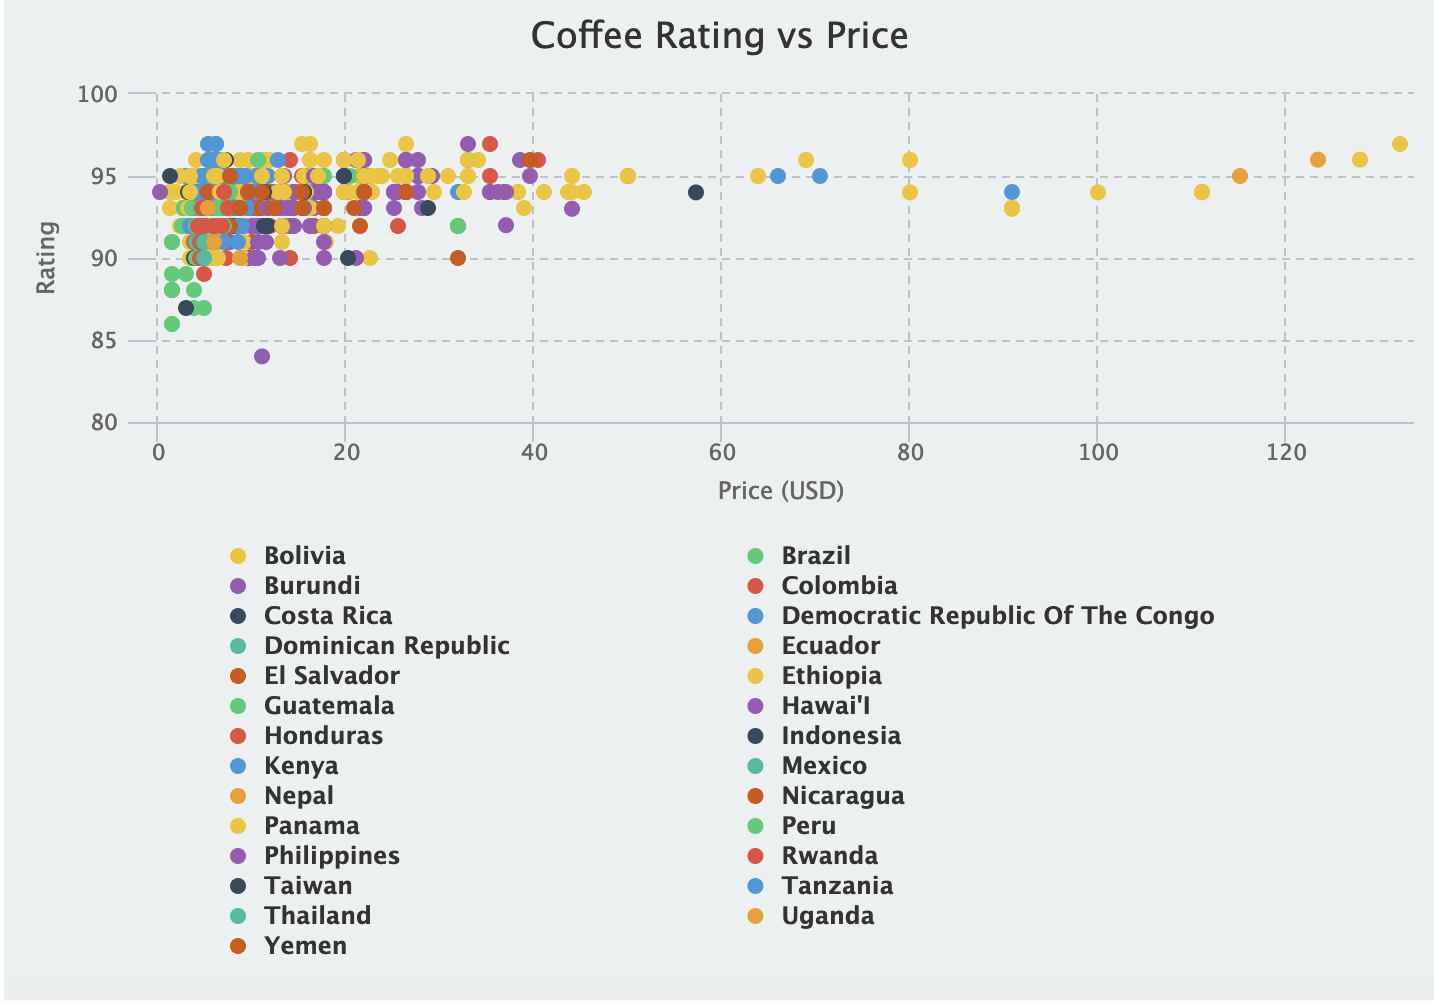

The chart shows that it is not necessarily true that expensive coffee is always of higher quality. There are a lot of cheap options for coffee that has high quality.

There are many factors that determine the quality of a coffee, such as the origin of the coffee beans, the roasting process, and the brewing method. Therefore, it is important to consider a range of factors when evaluating the quality of coffee, rather than just relying on the price as an indicator.

Additionally, the price of a coffee may also be influenced by other factors such as the location of the coffee shop, the popularity of the brand, and the overhead costs such as rent and staffing. Therefore, just because a coffee is expensive, it does not guarantee that it will be of the highest quality.

The relationship between the price and quality of coffee is complex and multifaceted. It is not always true that expensive coffee is of higher quality. It is essential to consider a range of factors and personal preferences when evaluating the quality of coffee.

# Best Coffee Shops in the World <a id="shops"></a>

Lastly, let's have a look at the best coffee shops in the world. We all know that coffee is a staple drink for many of us, whether it be for a morning pick-me-up or a midday break. With the rise of specialty coffee shops, there are more options than ever to indulge in a delicious cup of coffee. But with so many options, it can be hard to know where to go. That's why we are going to take a closer look at some of the best coffee shops around the world to help you find your new favorite spot.


In [ ]:
coffee_shop_ratings <- coffee %>%
  group_by(roaster) %>%
  summarize(Average_Rating = round(mean(rating), 2)) %>%
  arrange(desc(Average_Rating))

In [ ]:
head(coffee_shop_ratings, 25)

roaster,Average_Rating
<chr>,<dbl>
Campos Coffee,96.00
Kakalove Café,96.00
Port of Mokha,96.00
Genesis Coffee Lab,95.50
Hula Daddy Kona Coffee,95.12
Cafe Unido,95.00
DoDo Kaffa,95.00
Felala Coffee Lab,95.00
Fumi Coffee Company,95.00


Wow, that's a lot of competition! First place goes to three coffee shops; [Campos Coffee](https://camposcoffee.com/), [Kakalove Café](https://www.kakalovecafe.com.tw/) and [Port of Mokha](https://portofmokha.com/). The second place goes to [Genesis Coffee Lab](https://genesiscoffeelab.com/) and the third place goes to [Hula Daddy Kona Coffee](https://www.huladaddy.com/). Be sure to visit when you're nearby.

# Conclusion <a id="conclusion"></a>

In conclusion, this Notebook provides a comprehensive analysis of the world of coffee, exploring the top rated coffee brands, shops, origins and roast types. Through our visualizations, we have gained insights into the factors that influence the ratings and popularity of coffee brands, and have learned about some of the best coffee shops and locations to try.

Personal preferences also play a significant role in determining the quality of coffee. For example, some people might prefer a lighter roast, while others might prefer a darker roast. Some people might like their coffee to have a fruity flavor, while others might prefer a nutty flavor. Therefore, what might be considered as high-quality coffee for one person might not be the same for another.

There is a diverse range of high quality coffee origins around the world. The data highlights the importance of considering the origin of coffee when evaluating its quality and taste, as well as the potential for growth and development in the coffee industry in various countries.

It is also important to approach this data with a critical eye and to not make any definitive conclusions based solely on the rankings of the coffee shops. The best way to determine the quality of a coffee shop is to try it out for yourself and make your own judgment.

The findings suggest that the perfect coffee comes from Tanzania and has a light roast but there are highest rated(97) 10 coffee brands in the dataset but neither has a Tanzania origin. 2 have light roast while other 8 has medium-light roast.